## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

The objective of the project is to deliver insights to understand customer demands better and thus help developers to popularize the product.

This data set contains details of different applications and reviews from different users. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the data set

In [3]:
df=pd.read_csv('/content/Copy of Play Store Data.csv')

In [4]:
df2=pd.read_csv('/content/Copy of User Reviews.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [9]:
df.shape

(10841, 13)

In [10]:
df2.shape

(64295, 5)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
df.size

140933

# **DATA** **CLEANING**

In [15]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [18]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [19]:
# now start the process of data cleaning with the column 'type'.
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [20]:
df["Type"].fillna("Free", inplace=True)

In [21]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
# now move to the column 'content rating'.
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


WE can clearly see that the row 10472 has missing data for this column and all the remaining column are being replaced with its previous values.so, its better to drop this row from the data frame.

In [24]:
df.dropna(subset=['Content Rating'], inplace=True)

In [25]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

We are having some unwanted columns which will be of not much use in this data analysis process. so, lets drop these columns.

In [26]:
df.drop(['Current Ver','Last Updated','Android Ver'],axis=1, inplace=True)

In [27]:
df.shape

(10840, 10)

Now, we can fix the 'rating' column which has 1474 of missing values .Replace the missing values with the mode of that column.

In [28]:
rating_mode_value=df['Rating'].mode()

In [29]:
df['Rating'].fillna(value=rating_mode_value[0], inplace=True)

Finally fixing all the missing values ,let's look at the data frame.

In [30]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# **DATA** **PREPARATION**

In [31]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

Columns like Reviews, Size, Installs and price should have an int or float datatype. so, lets convert them.

In [32]:
# start with column "reviews"
df['Reviews']=df.Reviews.astype(int)

Next we can move to to the column 'size', but this columns conatins some special character like ',' '+' 'M' 'K' and some values varies with the device.

In [33]:
df['Size']= df.Size.apply(lambda x: x.strip('+'))        # removing the '+' sign


In [34]:
df['Size']= df.Size.apply(lambda x: x.replace(',' ,''))    # removing the ',' sign

In [35]:
df['Size']= df.Size.apply(lambda x: x.replace('M', 'e+6'))     # converting the M to Mega

In [36]:
df['Size']= df.Size.apply(lambda x: x.replace('K', 'e+3'))      # converting the K to Kilo

In [37]:
df['Size']=df.Size.replace('Varies with device', np.NaN)        # Replacing the varies with device with NaN

In [38]:
# since we converted the 'varies with device' with 'NaN' . so we have to do something with those set of NaN values data.
# It will be better idea to drop those rows .
df.dropna(subset=['Size'], inplace=True)

Now move to the column 'Installs' . to convert  this coulmn first of all, we need to remove  the + symbol values.

In [39]:
df['Installs']= df.Installs.apply(lambda x: x.strip('+'))


In [40]:
# and then let's remove the , symbol.
df['Installs']= df.Installs.apply(lambda x: x.replace(',', ''))

In [41]:
# at last we can convert it from string to numeric type.
df['Installs'] = pd.to_numeric(df['Installs'])

now move to the column Price. To convert this column first of all , we need to remove the $ symbol.

In [42]:
df['Price']= df.Price.apply(lambda x: x.strip('$'))
 

In [43]:
 # lastly convert this column from object to numeric type.
 df['Price']= pd.to_numeric(df['Price'])

In [44]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [45]:
df.shape

(9145, 10)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9145.0,4.208868e+00,5.072668e-01,1.0,4.1,4.4,4.5,5.000000e+00
Reviews,9145.0,2.490487e+05,1.716211e+06,0.0,22.0,742.0,25037.0,4.489389e+07
Installs,9145.0,7.114842e+06,4.619357e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Price,9145.0,1.184366e+00,1.735575e+01,0.0,0.0,0.0,0.0,4.000000e+02


# **EXPLORATORY** **DATA** **ANALYSIS**

In [48]:
sns.set_style('darkgrid')
matplotlib.pyplot.rcParams['font.size']=14
matplotlib.pyplot.rcParams['figure.figsize']=(9,5)
matplotlib.pyplot.rcParams['figure,facecolor']='#00000000'

NameError: ignored

**What are the top categories in the play store, which contains the highest number of apps?**

In [63]:
y=df['Category'].value_counts().index
x=df['Category'].value_counts
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])


TypeError: ignored

ValueError: ignored

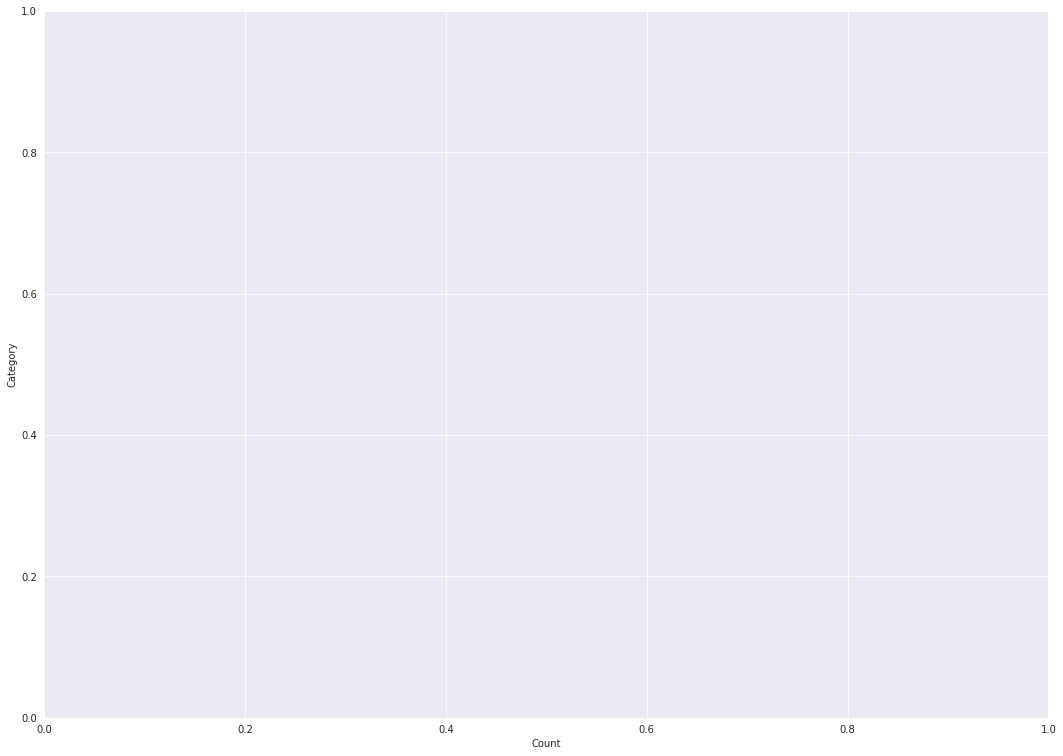

In [51]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")
graph=sns.barplot(x=xsis, y=ysis, palette="husl")
graph.set_title("Top categories on Google play store", fontsize= 25);

From the above graph  we can say that the most of the apps are under 
'family' and 'game' category and least are of 'beauty' and 'comics' category.

**Which category of apps from the 'Content rating' column is found more on the play store?**

In [52]:
x2=df['Content Rating'].value_counts().index
y2=df['Content Rating'].value_counts()

x2sis=[]
y2sis=[]

for i in range(len(x2)):
  x2sis.append(x2[i])
  y2sis.append(y2[i])



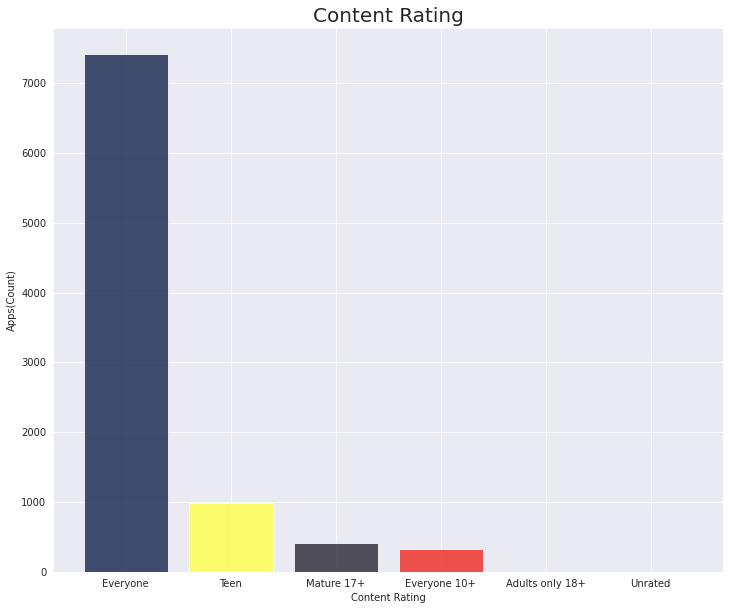

In [54]:
plt.figure(figsize=(12,10))
plt.bar(x2sis, y2sis, width=0.8, color=['#15244C', '#FFFF48', '#292734', '#EF2920', '#CD202D', '#ECC5F2'], alpha=0.8);
plt.title('Content Rating', size=20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot we see that 'Everyone' has the highest number of apps.

**Now look at the distribution of the 'ratings' of the data frame**

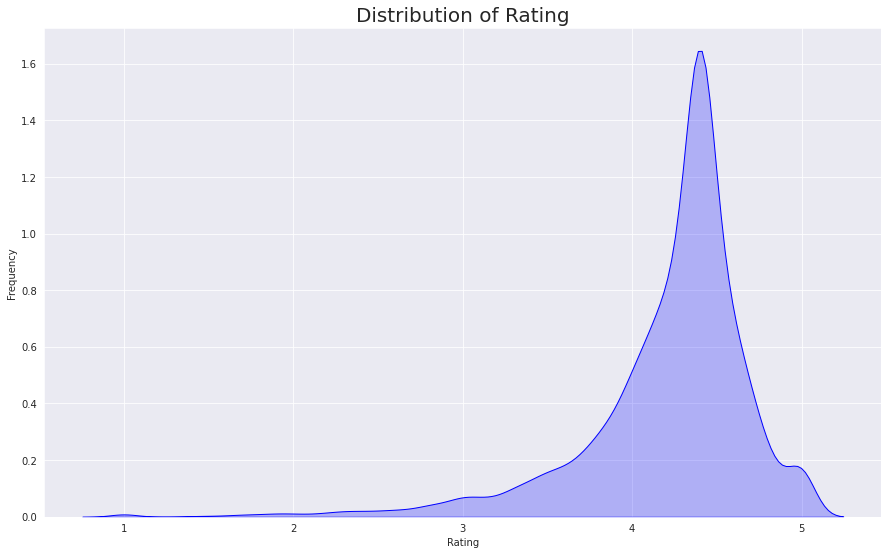

In [55]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph=sns.kdeplot(df.Rating, color= "Blue", shade=True)
plt.title('Distribution of Rating', size= 20);

From the abovr graph, we can see that the most of trh apps in the google play store are rated between 3.5 to 4.8

**Now let's plot a visualization graph to see what portion of the apps in the play store are free and paid.**

In [60]:
plt.figure(figsize=(10,10))
labels= df['Type'].value_counts(sort=True).index
sizes= df['type'].value_counts(sort=True)
colors=['red', 'lightgreen']
explode=(0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)

KeyError: ignored

<Figure size 720x720 with 0 Axes>

**Which category app's have the most number of installs?**

In [61]:
# To answer this question we need to create a separate dataframe.
highest_installs_df=df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

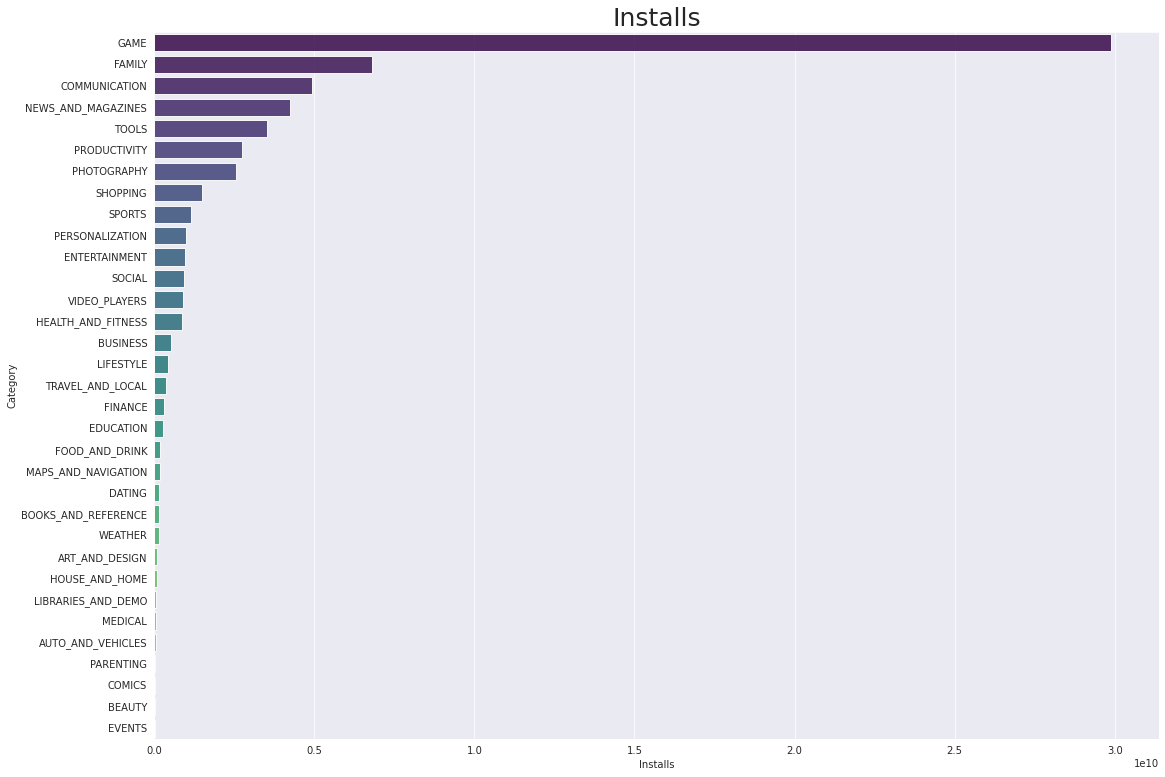

In [62]:
x3sis=[]
y3sis=[]

for i in range(len(highest_installs_df)):
  x3sis.append(highest_installs_df.Installs[i])
  y3sis.append(highest_installs_df.index[i])

plt.figure(figsize=(18,13))
plt.xlabel('Installs')
plt.ylabel('Category')
graph=sns.barplot(x= x3sis, y= y3sis, alpha=0.9, palette='viridis')
plt.title('Installs', fontsize=25);


**Till now we can come to many conclusions and get some insightful information from it**.**so lets start**

**What are the Top 10 installed apps in any Category?**

In [64]:
# for answering this question we need to define a function.
def findtop10incategory(str):
  str= str.upper()
  top10= df[df['Category']==str]
  top10apps= top10.sort_values(by='Installs', ascending=False).head(10)

  # top apps in art and design
  plt.figure(figsize=(15,12))
  plt.title('Top 10 Installed Apps', size=20);
  graph=sns.barplot(x= top10apps.App, y= top10apps.Installs)
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

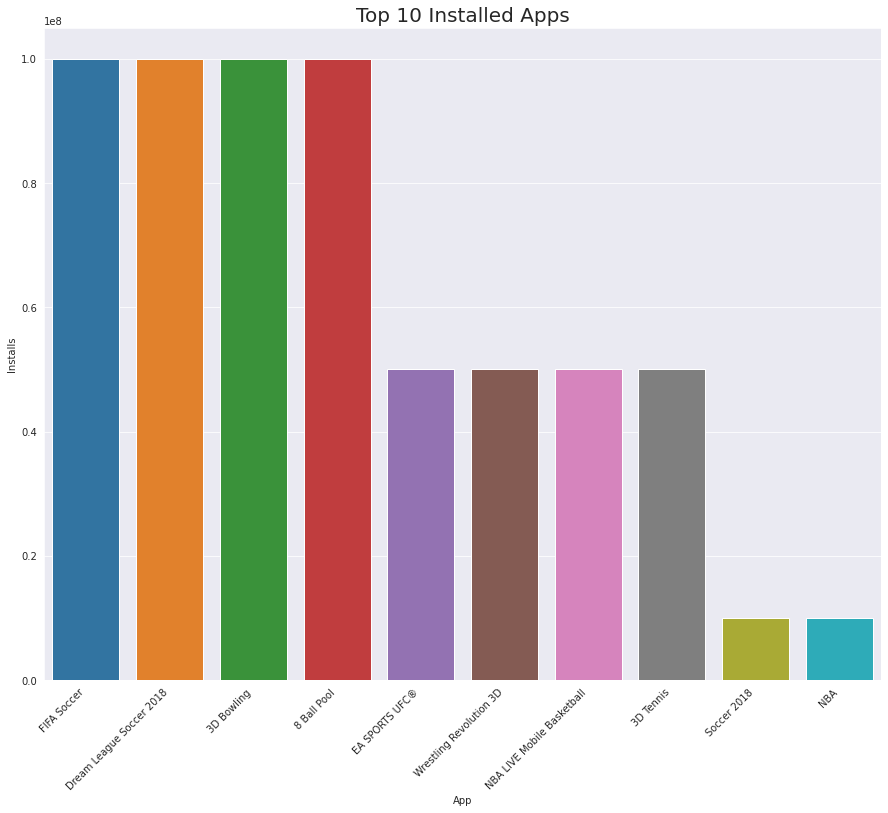

In [65]:
findtop10incategory('Sports')